In [17]:
import collections
import random
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.stats import binom
from matplotlib.pyplot import cm
import numpy as np
plt.style.use('dark_background')

### BINOMIAL

P on p=0.01: 0.9227
P on p=0.05: 0.6634


Text(0.5, 1.0, 'binom scipy CDF, w/ accept number k=0')

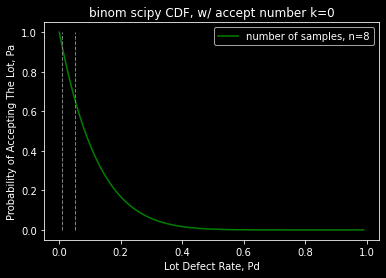

In [18]:
n = 8 # jumlah sample dari lot
k = 0 # jumlah defects bisa diterima

dict_result = {}
list_legend = []

for p_ in range(100):
    p = p_/100
    dict_result[p] = round(binom.cdf(k, n, p),4)

plt.plot(dict_result.keys(), dict_result.values(), color='g', label = k)
list_legend.append('number of samples, n='+str(n))

print("P on p=0.01:", round(dict_result[0.01],4))
print("P on p=0.05:", round(dict_result[0.05],4))
line_x1 = [0.01, 0.01]
line_x2 = [0.05, 0.05]
line_y = [0.0, 1.0]

plt.plot(line_x1, line_y, '--', color='grey', linewidth=1)
plt.plot(line_x2, line_y, '--', color='grey', linewidth=1)    
plt.legend(list_legend)
plt.ylabel('Probability of Accepting The Lot, Pa')
plt.xlabel('Lot Defect Rate, Pd')
plt.title('binom scipy CDF, w/ accept number k={}'.format(k))

### POISSON

P on p=0.01: 0.9231
P on p=0.05: 0.6703


Text(0.5, 1.0, 'poisson scipy CDF, w/ accept number k=0')

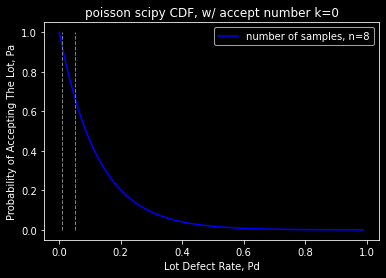

In [19]:
n = 8 # jumlah sample dari lot
k = 0 # jumlah defects bisa diterima

dict_result = {}
list_legend = []

for p_ in range(100):
    p = p_/100
    lambda_ = n*p
    dict_result[p] = round(poisson.cdf(k, lambda_),4)

plt.plot(dict_result.keys(), dict_result.values(), color='b', label = k)
list_legend.append('number of samples, n='+str(n))

print("P on p=0.01:", round(dict_result[0.01],4))
print("P on p=0.05:", round(dict_result[0.05],4))
line_x1 = [0.01, 0.01]
line_x2 = [0.05, 0.05]
line_y = [0.0, 1.0]

plt.plot(line_x1, line_y, '--', color='grey', linewidth=1)
plt.plot(line_x2, line_y, '--', color='grey', linewidth=1)    
plt.legend(list_legend)
plt.ylabel('Probability of Accepting The Lot, Pa')
plt.xlabel('Lot Defect Rate, Pd')
plt.title('poisson scipy CDF, w/ accept number k={}'.format(k))

### STOCHASTIC

In [20]:
def f_lot_events(lot_size, accept_rate):
    p = accept_rate
    lot_events = []
    for i in range(lot_size):
        event = random.random()
        # print(event)
        if event < p:
            lot_events.append('A')
        else:
            lot_events.append('R')

    # lot_frequency_events = collections.Counter(lot_events)
    # print(list_events)
    # print(dict(lot_frequency_events))
    return lot_events

In [21]:
def f_OC_curve(lot_size, defect_rate, sample_size, defect_permitted=0, count_trial=10_000):
    accept_rate = 1-defect_rate
    counter_accept = 0
    for i in range(count_trial):
        random.seed()
        lot_events = f_lot_events(lot_size, accept_rate)
        list_sample_series = random.sample(range(0, lot_size), sample_size)
        list_sample = []
        for i in(list_sample_series):
            list_sample.append(lot_events[i])

        # print(list_sample)
        # using Counter to find frequency of elements
        sample_frequency_events = collections.Counter(list_sample)

        # printing the frequency
        # print('dict(sample_frequency_events)____:', dict(sample_frequency_events))
        try:
            if dict(sample_frequency_events)['R'] <= defect_permitted:
                # print('dict(sample_frequency_events)[R]:', dict(sample_frequency_events)['R'])
                counter_accept += 1
                
        except:
            counter_accept += 1

    print('Probability of Accepting The Lot with lot size {}, sample size {}, sample defect permitted {}, defect rate {}: {}'.format(lot_size, sample_size, defect_permitted, defect_rate, round(counter_accept/count_trial,4)))

#### STOCHASTIC
lot size = 100
sample size = 8
defect rate = 1%

In [22]:
lot_size = 100
defect_rate = 0.01
sample_size = 8
count_trial = 10_000
defect_permitted = 0

f_OC_curve(lot_size, defect_rate, sample_size, defect_permitted, count_trial)

Probability of Accepting The Lot with lot size 100, sample size 8, sample defect permitted 0, defect rate 0.01: 0.9245


lot size = 100
sample size = 8
defect rate = 5%

In [23]:
lot_size = 10
defect_rate = 0.05
sample_size = 8
count_trial = 10_000
defect_permitted = 0

f_OC_curve(lot_size, defect_rate, sample_size, defect_permitted, count_trial)

Probability of Accepting The Lot with lot size 10, sample size 8, sample defect permitted 0, defect rate 0.05: 0.6606


In [24]:
lot_size = 100
defect_rate = 0.05
sample_size = 8
count_trial = 10_000
defect_permitted = 0

f_OC_curve(lot_size, defect_rate, sample_size, defect_permitted, count_trial)

Probability of Accepting The Lot with lot size 100, sample size 8, sample defect permitted 0, defect rate 0.05: 0.659


In [25]:
lot_size = 1000
defect_rate = 0.05
sample_size = 8
count_trial = 10_000
defect_permitted = 0

f_OC_curve(lot_size, defect_rate, sample_size, defect_permitted, count_trial)

Probability of Accepting The Lot with lot size 1000, sample size 8, sample defect permitted 0, defect rate 0.05: 0.6642


# DETERMINISTIC
sample size, n = 8
defect permitted, k = 2

P on p=0.01: 0.9999
P on p=0.05: 0.9942
P on p=0.15: 0.8948


Text(0.5, 1.0, 'binom scipy CDF')

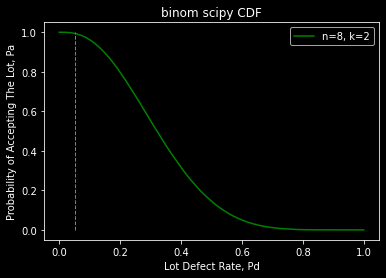

In [26]:
# n = jumlah sample dari lot
# k = jumlah defects bisa diterima

# BINOMIAL

list_sampling_plan = [[8,2]] # [n,k]

list_collection = []
list_legend = []
# color = iter(cm.rainbow(np.linspace(0, 1, n)))
color_list = ['g']
color_iter = iter(color_list)

for i in list_sampling_plan:
    dict_result = {}
    for p_ in range(1000):
        p = p_/1000
        dict_result[p] = round(binom.cdf(i[1], i[0], p),4) # binom.cdf(k, n, p)

    key_max = max(dict_result, key=dict_result.get)
    value_max = max(dict_result.values())
    # print('BINOMIAL')
    # print("n:", n)
    # print("k:", k)
    # print("Maximum value on",key_max, ":", value_max)
    print("P on p=0.01:", round(dict_result[0.01],4))
    print("P on p=0.05:", round(dict_result[0.05],4))
    print("P on p=0.15:", round(dict_result[0.15],4))
    col = next(color_iter)
    plt.plot(dict_result.keys(), dict_result.values(), color=col, label = k)
    list_legend.append('n={}, k={}'.format(i[0], i[1]))

line_x = [0.05, 0.05]
line_y = [0.0, 1.0]

plt.plot(line_x, line_y, '--', color='grey', linewidth=1)    
plt.legend(list_legend)
plt.ylabel('Probability of Accepting The Lot, Pa')
plt.xlabel('Lot Defect Rate, Pd')
plt.title('binom scipy CDF')


P on p=0.01: 0.9999
P on p=0.05: 0.9921
P on p=0.15: 0.8795


Text(0.5, 1.0, 'poisson scipy CDF')

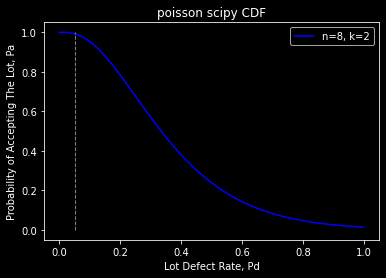

In [27]:
# n = jumlah sample dari lot
# k = jumlah defects bisa diterima

# POISSON

list_sampling_plan = [[8,2]] # [n,k]

list_collection = []
list_legend = []
# color = iter(cm.rainbow(np.linspace(0, 1, n)))
color_list = ['b']
color_iter = iter(color_list)

for i in list_sampling_plan:
    for p_ in range(1000):
        p = p_/1000
        lambda_ = i[0]*p
        dict_result[p] = round(poisson.cdf(i[1], lambda_),4) # poisson.cdf(k, lambda_)

    key_max = max(dict_result, key=dict_result.get)
    value_max = max(dict_result.values())
    # print('POISSON')
    # print("n:", n)
    # print("k:", k)
    # print("Maximum value on",key_max, ":", value_max)
    print("P on p=0.01:", round(dict_result[0.01],4))
    print("P on p=0.05:", round(dict_result[0.05],4))
    print("P on p=0.15:", round(dict_result[0.15],4))
    col = next(color_iter)
    plt.plot(dict_result.keys(), dict_result.values(), color=col, label = k)
    list_legend.append('n={}, k={}'.format(i[0], i[1]))

line_x = [0.05, 0.05]
line_y = [0.0, 1.0]

plt.plot(line_x, line_y, '--', color='grey', linewidth=1)    
plt.legend(list_legend)
plt.ylabel('Probability of Accepting The Lot, Pa')
plt.xlabel('Lot Defect Rate, Pd')
plt.title('poisson scipy CDF')


# STOCHASTIC
sample size, n = 8
defect permitted, k = 2

In [28]:
lot_size = 10
defect_rate = 0.05
sample_size = 8
count_trial = 10_000
defect_permitted = 2

f_OC_curve(lot_size, defect_rate, sample_size, defect_permitted, count_trial)

Probability of Accepting The Lot with lot size 10, sample size 8, sample defect permitted 2, defect rate 0.05: 0.9937


In [29]:
lot_size = 1000
defect_rate = 0.05
sample_size = 8
count_trial = 10_000
defect_permitted = 2

f_OC_curve(lot_size, defect_rate, sample_size, defect_permitted, count_trial)

Probability of Accepting The Lot with lot size 1000, sample size 8, sample defect permitted 2, defect rate 0.05: 0.9938


#### General Inspection Level: II

P on p=0.065: 0.963
P on p=0.065: 0.909
P on p=0.065: 0.952
P on p=0.065: 0.9626
P on p=0.065: 0.2608


Text(0.5, 1.0, 'binom scipy CDF')

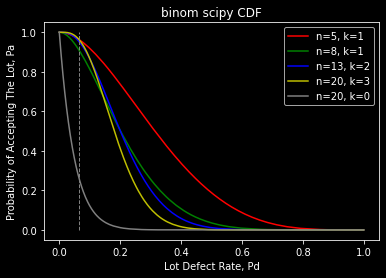

In [32]:
# n = jumlah sample dari lot
# k = jumlah defects bisa diterima

# BINOMIAL

list_sampling_plan = [[5,1], [8,1], [13,2], [20,3], [20,0]] # [n,k]
# list_sampling_plan = [[5,1], [8,1], [13,2], [20,3]] # [n,k]

list_collection = []
list_legend = []
# color = iter(cm.rainbow(np.linspace(0, 1, n)))
color_list = ['r', 'g', 'b', 'y', 'grey']
color_iter = iter(color_list)

for i in list_sampling_plan:
    dict_result = {}
    for p_ in range(1000):
        p = p_/1000
        dict_result[p] = round(binom.cdf(i[1], i[0], p),4) # binom.cdf(k, n, p)

    key_max = max(dict_result, key=dict_result.get)
    value_max = max(dict_result.values())
    # print('BINOMIAL')
    # print("n:", n)
    # print("k:", k)
    # print("Maximum value on",key_max, ":", value_max)
    print("P on p=0.065:", round(dict_result[0.065],4))
    col = next(color_iter)
    plt.plot(dict_result.keys(), dict_result.values(), color=col, label = k)
    list_legend.append('n={}, k={}'.format(i[0], i[1]))

line_x = [0.065, 0.065]
line_y = [0.0, 1.0]

plt.plot(line_x, line_y, '--', color='grey', linewidth=1)    
plt.legend(list_legend)
plt.ylabel('Probability of Accepting The Lot, Pa')
plt.xlabel('Lot Defect Rate, Pd')
plt.title('binom scipy CDF')


P on p=0.065: 0.9573
P on p=0.065: 0.9037
P on p=0.065: 0.9459
P on p=0.065: 0.9569
P on p=0.065: 0.2725


Text(0.5, 1.0, 'poisson scipy CDF')

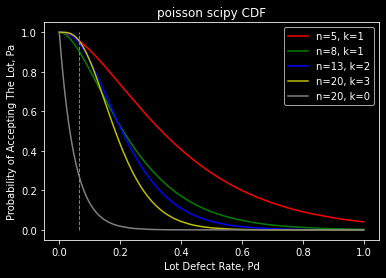

In [33]:
# n = jumlah sample dari lot
# k = jumlah defects bisa diterima

# PIOSSON

list_sampling_plan = [[5,1], [8,1], [13,2], [20,3], [20,0]] # [n,k]

list_collection = []
list_legend = []
# color = iter(cm.rainbow(np.linspace(0, 1, n)))
color_list = ['r', 'g', 'b', 'y', 'grey']
color_iter = iter(color_list)

for i in list_sampling_plan:
    for p_ in range(1000):
        p = p_/1000
        lambda_ = i[0]*p
        dict_result[p] = round(poisson.cdf(i[1], lambda_),4) # poisson.cdf(k, lambda_)

    key_max = max(dict_result, key=dict_result.get)
    value_max = max(dict_result.values())
    # print('BINOMIAL')
    # print("n:", n)
    # print("k:", k)
    # print("Maximum value on",key_max, ":", value_max)
    print("P on p=0.065:", round(dict_result[0.065],4))
    col = next(color_iter)
    plt.plot(dict_result.keys(), dict_result.values(), color=col, label = k)
    list_legend.append('n={}, k={}'.format(i[0], i[1]))

line_x = [0.065, 0.065]
line_y = [0.0, 1.0]

plt.plot(line_x, line_y, '--', color='grey', linewidth=1)    
plt.legend(list_legend)
plt.ylabel('Probability of Accepting The Lot, Pa')
plt.xlabel('Lot Defect Rate, Pd')
plt.title('poisson scipy CDF')
